In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("boston.csv")

In [3]:
df2 = df[["CHAS", "DIS", "MEDV"]].rename(columns={ "CHAS": "Vicino fiume", "DIS": "distanza dal lavoro", "MEDV": "Prezzo medio"})
df2.reset_index(drop=True, inplace=True)

In [4]:
print("\n\n", df2)
print("\nvalori mancanti trovati:\n", df2.isnull().sum())
df2["Vicino fiume"].mean()
df2["Vicino fiume"].max()
df2["distanza dal lavoro"].mean()
df2["distanza dal lavoro"].max()
df2["Prezzo medio"].mean()
df2["Prezzo medio"].max()
df2.describe()



      Vicino fiume  distanza dal lavoro  Prezzo medio
0               0               4.0900          24.0
1               0               4.9671          21.6
2               0               4.9671          34.7
3               0               6.0622          33.4
4               0               6.0622          36.2
..            ...                  ...           ...
501             0               2.4786          22.4
502             0               2.2875          20.6
503             0               2.1675          23.9
504             0               2.3889          22.0
505             0               2.5050          11.9

[506 rows x 3 columns]

valori mancanti trovati:
 Vicino fiume           0
distanza dal lavoro    0
Prezzo medio           0
dtype: int64


,Vicino fiume,distanza dal lavoro,Prezzo medio
count,506.000000,506.000000,506.000000
mean,0.069170,3.795043,22.532806
std,0.253994,2.105710,9.197104
min,0.000000,1.129600,5.000000
25%,0.000000,2.100175,17.025000
50%,0.000000,3.207450,21.200000
75%,0.000000,5.188425,25.000000
max,1.000000,12.126500,50.000000


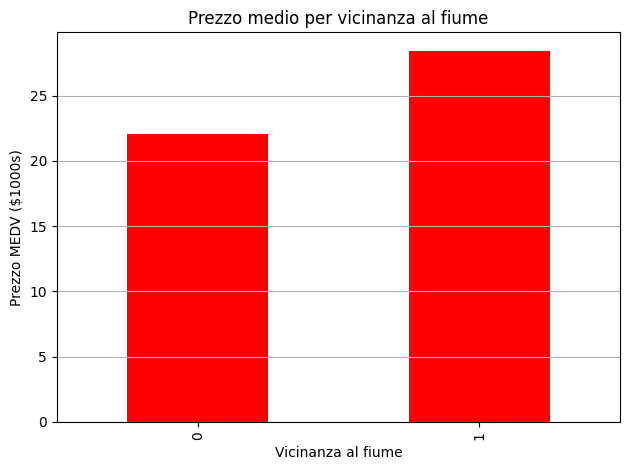

In [5]:
df2.groupby('Vicino fiume')['Prezzo medio'].mean().plot(kind="bar", color=['red'], legend=False)
plt.title("Prezzo medio per vicinanza al fiume")
plt.xlabel("Vicinanza al fiume")
plt.ylabel("Prezzo MEDV ($1000s)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [6]:
def miglia(dis):
    if dis <= 2:
        return "0-2"
    elif dis <= 5:
        return "3-5"
    elif dis <= 7:
        return "7-8"
    else:
        return "8+"

df2["Miglia"]=df2["distanza dal lavoro"].apply(miglia)
df2["Miglia"].value_counts()

Miglia
3-5    259
0-2    112
7-8     86
8+      49
Name: count, dtype: int64

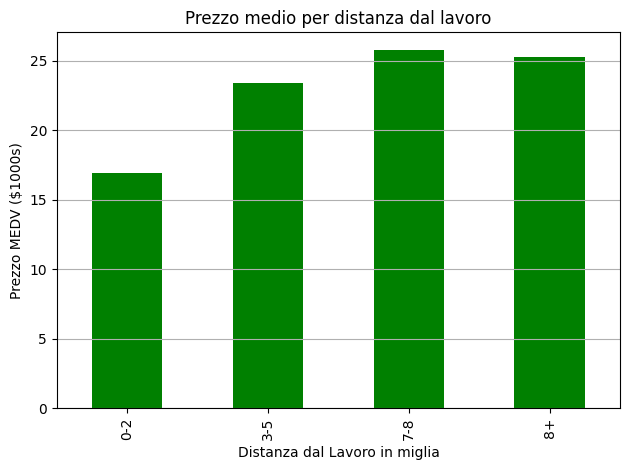

In [7]:
df2.groupby('Miglia')['Prezzo medio'].mean().plot(kind="bar", color=['green'], legend=False)
plt.title("Prezzo medio per distanza dal lavoro")
plt.xlabel("Distanza dal Lavoro in miglia")
plt.ylabel("Prezzo MEDV ($1000s)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()